In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import json
from pandas import json_normalize

df = pd.read_json('/content/drive/MyDrive/NTPUIM/NTCIR/FinNUM 3/Dataset/FinNum-3_train.json') #Results contain the required data
df

,text,target_numeral,category,offset,claim
0,巨大為全球最大自行車製造商，擁有捷安特、Liv、Momentum三個自有品牌，營收比重70%...,30.0,absolute,52,0
1,巨大為全球最大自行車製造商，擁有捷安特、Liv、Momentum三個自有品牌，營收比重70%...,2000.0,date,118,0
2,巨大3Q18營收162.50億元，YoY+8.89%，成長動能來自歐洲電動自行車持續熱銷，代...,3.0,date,2,0
3,巨大3Q18營收162.50億元，YoY+8.89%，成長動能來自歐洲電動自行車持續熱銷，代...,18.0,date,4,0
4,巨大3Q18營收162.50億元，YoY+8.89%，成長動能來自歐洲電動自行車持續熱銷，代...,162.5,money,8,0
...,...,...,...,...,...
4214,聚陽4Q18起，產能供不應求，挑單生產，ASP+3%YoY，營收達61億元(+16.5%Yo...,2.0,date,233,0
4215,聚陽4Q18起，產能供不應求，挑單生產，ASP+3%YoY，營收達61億元(+16.5%Yo...,19.0,date,235,0
4216,聚陽4Q18起，產能供不應求，挑單生產，ASP+3%YoY，營收達61億元(+16.5%Yo...,2019.0,date,256,0
4217,聚陽4Q18起，產能供不應求，挑單生產，ASP+3%YoY，營收達61億元(+16.5%Yo...,270.0,money,264,1


In [ ]:
df_dummies = pd.get_dummies(df['category'])
# df_dummies.concats(df, axis = 1)
#df_dummies
df_dummies['claim'] = df['claim']
df_dummies.corr()

,None,Product Number,Quantity_absolute,Quantity_relative,absolute,change,date,money,price,relative,time,claim
None,1.000000,-0.021773,-0.032530,-0.004283,-0.054669,-0.005247,-0.118480,-0.064066,-0.017526,-0.059923,-0.003709,-0.077438
Product Number,-0.021773,1.000000,-0.036645,-0.004824,-0.061583,-0.005910,-0.133465,-0.072169,-0.019743,-0.067502,-0.004178,-0.083584
Quantity_absolute,-0.032530,-0.036645,1.000000,-0.007208,-0.092009,-0.008830,-0.199407,-0.107826,-0.029497,-0.100853,-0.006242,-0.039851
Quantity_relative,-0.004283,-0.004824,-0.007208,1.000000,-0.012114,-0.001163,-0.026253,-0.014196,-0.003883,-0.013278,-0.000822,-0.017159
absolute,-0.054669,-0.061583,-0.092009,-0.012114,1.000000,-0.014840,-0.335111,-0.181206,-0.049571,-0.169488,-0.010489,0.060928
change,-0.005247,-0.005910,-0.008830,-0.001163,-0.014840,1.000000,-0.032161,-0.017391,-0.004757,-0.016266,-0.001007,0.023366
date,-0.118480,-0.133465,-0.199407,-0.026253,-0.335111,-0.032161,1.000000,-0.392718,-0.107433,-0.367321,-0.022733,-0.474683
money,-0.064066,-0.072169,-0.107826,-0.014196,-0.181206,-0.017391,-0.392718,1.000000,-0.058093,-0.198623,-0.012293,0.371136
price,-0.017526,-0.019743,-0.029497,-0.003883,-0.049571,-0.004757,-0.107433,-0.058093,1.000000,-0.054336,-0.003363,0.082548
relative,-0.059923,-0.067502,-0.100853,-0.013278,-0.169488,-0.016266,-0.367321,-0.198623,-0.054336,1.000000,-0.011498,0.259971


In [ ]:
from scipy.stats import spearmanr

correlation, p = spearmanr(df_dummies)
print('correlation',correlation)
print('p-value',p)
df_p_value = pd.DataFrame(p, columns = ['None',	'Product Number',	'Quantity_absolute',	'Quantity_relative',	'absolute',' change',	'date',	'money',	'price',	'relative',	'time','claim'], index =  ['None',	'Product Number',	'Quantity_absolute',	'Quantity_relative',	'absolute',' change',	'date',	'money',	'price',	'relative',	'time','claim'])
print(df_p_value)

correlation [[ 1.00000000e+00 -2.17728257e-02 -3.25303954e-02 -4.28280683e-03
  -5.46685094e-02 -5.24659059e-03 -1.18480222e-01 -6.40663346e-02
  -1.75262210e-02 -5.99232056e-02 -3.70857961e-03 -7.74376364e-02]
 [-2.17728257e-02  1.00000000e+00 -3.66445656e-02 -4.82446013e-03
  -6.15825216e-02 -5.91013514e-03 -1.33464601e-01 -7.21689045e-02
  -1.97427896e-02 -6.75017875e-02 -4.17760950e-03 -8.35837985e-02]
 [-3.25303954e-02 -3.66445656e-02  1.00000000e+00 -7.20814091e-03
  -9.20093609e-02 -8.83022881e-03 -1.99407110e-01 -1.07826289e-01
  -2.94973543e-02 -1.00853232e-01 -6.24169277e-03 -3.98514299e-02]
 [-4.28280683e-03 -4.82446013e-03 -7.20814091e-03  1.00000000e+00
  -1.21135423e-02 -1.16254856e-03 -2.62530511e-02 -1.41959285e-02
  -3.88349015e-03 -1.32778869e-02 -8.21753443e-04 -1.71587645e-02]
 [-5.46685094e-02 -6.15825216e-02 -9.20093609e-02 -1.21135423e-02
   1.00000000e+00 -1.48395198e-02 -3.35110882e-01 -1.81205990e-01
  -4.95713738e-02 -1.69487514e-01 -1.04893911e-02  6.0928319

In [ ]:
df_corr = pd.DataFrame(correlation, columns = ['None',	'Product Number',	'Quantity_absolute',	'Quantity_relative',	'absolute',' change',	'date',	'money',	'price',	'relative',	'time','claim'], index =  ['None',	'Product Number',	'Quantity_absolute',	'Quantity_relative',	'absolute',' change',	'date',	'money',	'price',	'relative',	'time','claim'])
df_corr

,None,Product Number,Quantity_absolute,Quantity_relative,absolute,change,date,money,price,relative,time,claim
None,1.000000,-0.021773,-0.032530,-0.004283,-0.054669,-0.005247,-0.118480,-0.064066,-0.017526,-0.059923,-0.003709,-0.077438
Product Number,-0.021773,1.000000,-0.036645,-0.004824,-0.061583,-0.005910,-0.133465,-0.072169,-0.019743,-0.067502,-0.004178,-0.083584
Quantity_absolute,-0.032530,-0.036645,1.000000,-0.007208,-0.092009,-0.008830,-0.199407,-0.107826,-0.029497,-0.100853,-0.006242,-0.039851
Quantity_relative,-0.004283,-0.004824,-0.007208,1.000000,-0.012114,-0.001163,-0.026253,-0.014196,-0.003883,-0.013278,-0.000822,-0.017159
absolute,-0.054669,-0.061583,-0.092009,-0.012114,1.000000,-0.014840,-0.335111,-0.181206,-0.049571,-0.169488,-0.010489,0.060928
change,-0.005247,-0.005910,-0.008830,-0.001163,-0.014840,1.000000,-0.032161,-0.017391,-0.004757,-0.016266,-0.001007,0.023366
date,-0.118480,-0.133465,-0.199407,-0.026253,-0.335111,-0.032161,1.000000,-0.392718,-0.107433,-0.367321,-0.022733,-0.474683
money,-0.064066,-0.072169,-0.107826,-0.014196,-0.181206,-0.017391,-0.392718,1.000000,-0.058093,-0.198623,-0.012293,0.371136
price,-0.017526,-0.019743,-0.029497,-0.003883,-0.049571,-0.004757,-0.107433,-0.058093,1.000000,-0.054336,-0.003363,0.082548
relative,-0.059923,-0.067502,-0.100853,-0.013278,-0.169488,-0.016266,-0.367321,-0.198623,-0.054336,1.000000,-0.011498,0.259971


In [ ]:
df_corr['claim']

None                -0.077438
Product Number      -0.083584
Quantity_absolute   -0.039851
Quantity_relative   -0.017159
absolute             0.060928
 change              0.023366
date                -0.474683
money                0.371136
price                0.082548
relative             0.259971
time                -0.014858
claim                1.000000
Name: claim, dtype: float64

In [ ]:
df_p_value['claim']

None                  4.755005e-07
Product Number        5.418674e-08
Quantity_absolute     9.632100e-03
Quantity_relative     2.651594e-01
absolute              7.493901e-05
 change               1.291454e-01
date                 4.195723e-236
money                6.457895e-138
price                 7.901211e-08
relative              3.928384e-66
time                  3.346140e-01
claim                 0.000000e+00
Name: claim, dtype: float64

In [ ]:
df.shape

(4219, 5)

In [ ]:

dic = { 'category' : df['category'].value_counts().index , 'count' : df['category'].value_counts(), }
df_cat_count = pd.DataFrame(dic).reset_index(drop = True)
df_cat_count

,category,count
0,relative,2089
1,date,1616
2,money,1496
3,quantity_absolute,1193
4,absolute,683
5,other,406
6,change,398
7,product number,235
8,quantity_relative,178
9,ranking,35


In [ ]:
df['cat_id'] = df['category'].factorize()[0]
df.sample(20)

,paragraph,target_num,category,offset_start,offset_end,claim,cat_id
7554,Now moving on to the financials. Fourth quarte...,3.00,relative,212,213,0,3
95,More and more companies are giving their teams...,35000.00,quantity_absolute,249,254,0,4
3070,In the fourth quarter operating expense as a p...,2017.00,date,783,788,0,0
1237,Thanks Bob and good afternoon everyone. Exclud...,1.48,money,136,140,0,2
1992,In line with our ongoing goal to reduce relian...,4.00,money,169,170,0,2
745,Looking at our geographies. Americas grew 8% E...,19.00,relative,145,147,0,3
591,Thank you Marilyn and good afternoon everyone....,0.70,money,173,177,0,2
8058,We've delivered nearly $1 billion of savings i...,4.00,quantity_absolute,107,108,0,4
486,On the issue of trade we urge government leade...,200.00,money,357,360,0,2
5203,Before I turn it back to Steve I want to provi...,4000.00,quantity_absolute,284,288,1,4


In [ ]:
from pandas.core.internals.managers import T
cat_group = df.groupby(['category','claim'])
cat_df = pd.DataFrame(cat_group.size(), columns = ['count'])
cat_df
# cat_group.size()

count
category          claim       
absolute          0        490
                  1        193
change            0        298
                  1        100
date              0       1616
money             0       1144
                  1        352
other             0        404
                  1          2
product number    0        226
                  1          9
quantity_absolute 0       1050
                  1        143
quantity_relative 0        161
                  1         17
ranking           0         35
relative          0       1866
                  1        223
time              0          8

In [ ]:
import numpy as np

cat_df['percentage'] =  np.round(cat_df['count'].values/len(df)*100, 2)
cat_df['in-group perc']

count  percentage
category          claim                   
absolute          0        490        5.88
                  1        193        2.31
change            0        298        3.57
                  1        100        1.20
date              0       1616       19.38
money             0       1144       13.72
                  1        352        4.22
other             0        404        4.85
                  1          2        0.02
product number    0        226        2.71
                  1          9        0.11
quantity_absolute 0       1050       12.59
                  1        143        1.72
quantity_relative 0        161        1.93
                  1         17        0.20
ranking           0         35        0.42
relative          0       1866       22.38
                  1        223        2.67
time              0          8        0.10

In [ ]:
df_p_value[df_p_value['claim'] <0.05]['claim']
# df_p_value

absolute          2.929517e-39
change            4.117521e-15
date              4.287329e-65
money             5.688505e-47
other             6.466051e-14
product number    4.787739e-05
ranking           2.529056e-02
relative          4.268378e-03
claim             0.000000e+00
Name: claim, dtype: float64

In [ ]:
df_p_value[df_p_value['claim'] >0.05]['claim']

quantity_absolute    0.590874
quantity_relative    0.234491
time                 0.285700
Name: claim, dtype: float64

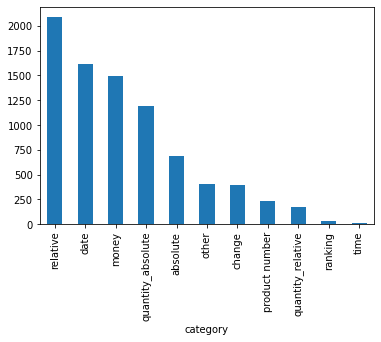

In [ ]:
# import matplotlib.pyplot as plt
df_cat_count.plot(x = 'category', y = 'count', kind = 'bar', legend = False)
# plt.title('分類數目')
# plt.ylabel('數量')
# plt.xlabel('種類')

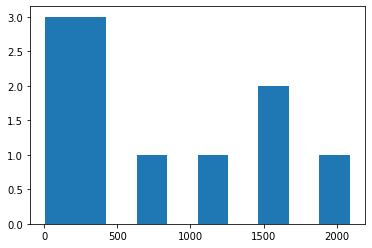

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# x = np.array(df_cat_count['count'])
# y = np.array(df_cat_count['category'])
nmp=df_cat_count['count'].to_numpy()
x = np.random.normal(nmp)
plt.hist(x)
plt.show()

In [ ]:
df.shape

(8337, 6)

In [ ]:
df[df['category'] == 'None']

,text,target_numeral,category,offset,claim,cat_id
60,2019年成長重點包括1)、手機應用取得新訂單，預估年營收貢獻7.5億，占比大幅向上，2)、...,1.0,None,11,0,6
62,2019年成長重點包括1)、手機應用取得新訂單，預估年營收貢獻7.5億，占比大幅向上，2)、...,2.0,None,43,0,6
64,2019年成長重點包括1)、手機應用取得新訂單，預估年營收貢獻7.5億，占比大幅向上，2)、...,3.0,None,78,0,6
105,時序正處於產業傳統旺季，不過受到中、美兩大車市銷售偏弱及中美貿易戰的干擾，汽車零組件族群11...,2231.0,None,152,0,6
107,時序正處於產業傳統旺季，不過受到中、美兩大車市銷售偏弱及中美貿易戰的干擾，汽車零組件族群11...,99551.0,None,173,0,6
...,...,...,...,...,...,...
3772,展望2019年的營運動能，我們看好(1)線上廣告收入倍數成長，數字科技自2016年起跨入新屋...,101.0,None,249,0,6
3776,展望2019年的營運動能，我們看好(1)線上廣告收入倍數成長，數字科技自2016年起跨入新屋...,101.0,None,306,0,6
3981,華航RPK過去維持6%以上成長，我們預估18/19年將維持6.7%/6.5%之成長，主因1）...,1.0,None,44,0,6
3982,華航RPK過去維持6%以上成長，我們預估18/19年將維持6.7%/6.5%之成長，主因1）...,350.0,None,47,0,6


In [ ]:
cat_id_df = df.loc[ : ,['category','cat_id']].drop_duplicates().sort_values('cat_id').reset_index(drop = True)
cat_id_df

,category,cat_id
0,absolute,0
1,date,1
2,money,2
3,relative,3
4,Quantity_absolute,4
5,price,5
6,None,6
7,time,7
8,Quantity_relative,8
9,Product Number,9


In [ ]:
a =df[df['claim'] == 0]
print(len(a)/len(df))

0.7632140317610808


In [ ]:
a = 'This is my house '
print(len(a))

17


In [ ]:
df_text = df['text'].drop_duplicates()
df_text

0       巨大為全球最大自行車製造商，擁有捷安特、Liv、Momentum三個自有品牌，營收比重70%...
2       巨大3Q18營收162.50億元，YoY+8.89%，成長動能來自歐洲電動自行車持續熱銷，代...
11      展望後市，2019年，巨大電動自行車業務成長動能較為可觀，2018年估計銷量38萬輛，佔營收...
28      勝華在2014年申請重整，旭軟營運受到重創，近年持續調整客戶結構，2017年營收己回到接近往...
48      2019年陸系手機品牌廠商主推窄邊框機種，旭軟間接取得空板訂單，分為1.6億條及0.5億條二...
                              ...                        
4122    桂盟12速產品自2017年推出後，僅在補修市場運用，市佔相對小，隨著電動車在歐洲慢慢增長，加...
4128    旭富3Q18營收5.19億元，QoQ-2.08%、YoY+46.29%，毛利率40.74%，...
4148    美國聖誕節服飾銷售YoY創2010年以來最大的增幅，使得聚陽上修1H19訂單，且1Q19AS...
4159    儘管美股12月重挫，但並未衝擊到美國零售買氣，美國聖誕節銷售服裝銷售佳，銷售額大增7.9%Y...
4190    聚陽4Q18起，產能供不應求，挑單生產，ASP+3%YoY，營收達61億元(+16.5%Yo...
Name: text, Length: 290, dtype: object

In [ ]:
import re
def date_form(text):
    regex_date_pattern  = 'd{4}' + '年'
    if re.match(text, regex_date_pattern):
        return True 

print(date_form('展望後市，2019年，巨大電動自行車業務成長動能較為可觀，2018年估計銷量38萬輛'))

None


In [ ]:
print(re.match( '年估計','展望後市，2019年，巨大電動自行車業務成長動能較為可觀，2018年估計銷量38萬輛'))

None
